In [5]:
import rasterio
from matplotlib import pyplot

#Download the backscatter time series from https://sedac.ciesin.columbia.edu/data/set/urbanspatial-urban-land-backscatter-time-series-1993-2020
#The series is presented following the specific sensor, so we'll need to put them together later
#Variables of a netCDF dataset can be accessed using “netcdf” scheme identifiers.
ers = 'netcdf:/Users/guilhermeiablonovski/Desktop/WRI_Expansao urbana/land_seasonal_backscatter/ERS_seasonal_land_sig0_mean.nc:sig0'
ascat = 'netcdf:/Users/guilhermeiablonovski/Desktop/WRI_Expansao urbana/land_seasonal_backscatter/ASCAT_seasonal_land_sig0_mean.nc:sig0'
quikscat = 'netcdf:/Users/guilhermeiablonovski/Desktop/WRI_Expansao urbana/land_seasonal_backscatter/QuikSCAT_seasonal_land_sig0_mean.nc:sig0'

In [26]:
#Open one of them with rasterio
dataset = rasterio.open(quikscat)
#Check how many layers there are in the quickscat netcdf file
dataset.count

44

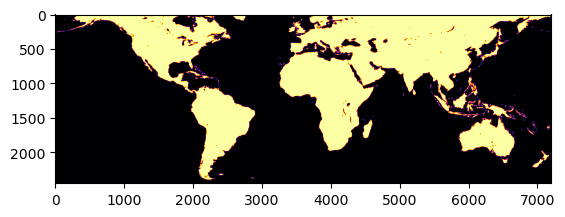

In [28]:
#Investigate what it looks like
pyplot.imshow(dataset.read(3), cmap='inferno')
pyplot.show()

In [83]:
#Clip a single backscatter image for Brazil and export it as geotiff
import geopandas as gpd
import pandas as pd
pixelzonessrc = r'/Users/guilhermeiablonovski/Desktop/WRI_Expansao urbana/land_seasonal_backscatter/Backscatter_pixel_vectorized.shp'
pixelzones = gpd.read_file(pixelzonessrc)

In [86]:
#Run a zonal stats operation in order to downsample the landuse data from MapBiomas

#Import rasterstats
from rasterstats import zonal_stats
from shapely.geometry import box


def getFeatures(gdf):
    """Function to parse features from GeoDataFrame in such a manner that rasterio wants them"""
    import json
    return [json.loads(gdf.to_json())['features'][0]['geometry']]


for state in range(0,27):
    #Open the first urban land use raster for each state, generated in the last step
    first=rasterio.open('/Users/guilhermeiablonovski/Desktop/WRI_Expansao urbana/expansao_imagens/'+str(state)+'_1993.tif')
    #Get bounds
    geom = box(*first.bounds)
    bounds = gpd.GeoDataFrame({"id":1,"geometry":[geom]}, crs="EPSG:4326")
    zones = gpd.sjoin(pixelzones, bounds, how = 'inner', op = 'within')
    zones = zones.reset_index()
    for i in range(1993,2021):
        ndvix=rasterio.open('/Users/guilhermeiablonovski/Desktop/WRI_Expansao urbana/expansao_imagens/'+str(state)+'_'+str(i)+'.tif')
        #Identify the vector features
        coords = getFeatures(zones)   
        array = ndvix.read(1)
        #Run the zonal stats function from rasterstats
        affine = ndvix.transform
        zs_ndvix = zonal_stats(zones, array, affine=affine, stats=['count','sum'])
        #Create a dataframe for the results and join them into the parcel's geodataframe
        ndviframe = pd.DataFrame(zs_ndvix)
        ndviframe['urban'] = ndviframe['sum']/ndviframe['count']
        ndviframe = ndviframe.drop(['sum','count'], axis=1)
        zones = zones.join(ndviframe, rsuffix="_"+str(i))
    zones.to_file('zonalstats/'+str(state)+'_stats.shp')
    

/Users/guilhermeiablonovski/opt/anaconda3/envs/geopandasenv/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3444: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):
/Users/guilhermeiablonovski/opt/anaconda3/envs/geopandasenv/lib/python3.7/site-packages/rasterstats/io.py:302: UserWarning: Setting nodata to -999; specify nodata explicitly
  warnings.warn("Setting nodata to -999; specify nodata explicitly")
/Users/guilhermeiablonovski/opt/anaconda3/envs/geopandasenv/lib/python3.7/site-packages/rasterstats/io.py:302: UserWarning: Setting nodata to -999; specify nodata explicitly
  warnings.warn("Setting nodata to -999; specify nodata explicitly")
/Users/guilhermeiablonovski/opt/anaconda3/envs/geopandasenv/lib/python3.7/site-packages/rasterstats/io.py:302: UserWarning: Setting nodata to -999; specify nodata explicitly
  warnings.warn("Settin

/Users/guilhermeiablonovski/opt/anaconda3/envs/geopandasenv/lib/python3.7/site-packages/rasterstats/io.py:302: UserWarning: Setting nodata to -999; specify nodata explicitly
  warnings.warn("Setting nodata to -999; specify nodata explicitly")
/Users/guilhermeiablonovski/opt/anaconda3/envs/geopandasenv/lib/python3.7/site-packages/rasterstats/io.py:302: UserWarning: Setting nodata to -999; specify nodata explicitly
  warnings.warn("Setting nodata to -999; specify nodata explicitly")
/Users/guilhermeiablonovski/opt/anaconda3/envs/geopandasenv/lib/python3.7/site-packages/rasterstats/io.py:302: UserWarning: Setting nodata to -999; specify nodata explicitly
  warnings.warn("Setting nodata to -999; specify nodata explicitly")
/Users/guilhermeiablonovski/opt/anaconda3/envs/geopandasenv/lib/python3.7/site-packages/rasterstats/io.py:302: UserWarning: Setting nodata to -999; specify nodata explicitly
  warnings.warn("Setting nodata to -999; specify nodata explicitly")
/Users/guilhermeiablonovski/

/Users/guilhermeiablonovski/opt/anaconda3/envs/geopandasenv/lib/python3.7/site-packages/rasterstats/io.py:302: UserWarning: Setting nodata to -999; specify nodata explicitly
  warnings.warn("Setting nodata to -999; specify nodata explicitly")
/Users/guilhermeiablonovski/opt/anaconda3/envs/geopandasenv/lib/python3.7/site-packages/rasterstats/io.py:302: UserWarning: Setting nodata to -999; specify nodata explicitly
  warnings.warn("Setting nodata to -999; specify nodata explicitly")
/Users/guilhermeiablonovski/opt/anaconda3/envs/geopandasenv/lib/python3.7/site-packages/rasterstats/io.py:302: UserWarning: Setting nodata to -999; specify nodata explicitly
  warnings.warn("Setting nodata to -999; specify nodata explicitly")
/Users/guilhermeiablonovski/opt/anaconda3/envs/geopandasenv/lib/python3.7/site-packages/rasterstats/io.py:302: UserWarning: Setting nodata to -999; specify nodata explicitly
  warnings.warn("Setting nodata to -999; specify nodata explicitly")
/Users/guilhermeiablonovski/

/Users/guilhermeiablonovski/opt/anaconda3/envs/geopandasenv/lib/python3.7/site-packages/rasterstats/io.py:302: UserWarning: Setting nodata to -999; specify nodata explicitly
  warnings.warn("Setting nodata to -999; specify nodata explicitly")
/Users/guilhermeiablonovski/opt/anaconda3/envs/geopandasenv/lib/python3.7/site-packages/rasterstats/io.py:302: UserWarning: Setting nodata to -999; specify nodata explicitly
  warnings.warn("Setting nodata to -999; specify nodata explicitly")
/Users/guilhermeiablonovski/opt/anaconda3/envs/geopandasenv/lib/python3.7/site-packages/rasterstats/io.py:302: UserWarning: Setting nodata to -999; specify nodata explicitly
  warnings.warn("Setting nodata to -999; specify nodata explicitly")
/Users/guilhermeiablonovski/opt/anaconda3/envs/geopandasenv/lib/python3.7/site-packages/rasterstats/io.py:302: UserWarning: Setting nodata to -999; specify nodata explicitly
  warnings.warn("Setting nodata to -999; specify nodata explicitly")
/Users/guilhermeiablonovski/

/Users/guilhermeiablonovski/opt/anaconda3/envs/geopandasenv/lib/python3.7/site-packages/rasterstats/io.py:302: UserWarning: Setting nodata to -999; specify nodata explicitly
  warnings.warn("Setting nodata to -999; specify nodata explicitly")
/Users/guilhermeiablonovski/opt/anaconda3/envs/geopandasenv/lib/python3.7/site-packages/rasterstats/io.py:302: UserWarning: Setting nodata to -999; specify nodata explicitly
  warnings.warn("Setting nodata to -999; specify nodata explicitly")
/Users/guilhermeiablonovski/opt/anaconda3/envs/geopandasenv/lib/python3.7/site-packages/rasterstats/io.py:302: UserWarning: Setting nodata to -999; specify nodata explicitly
  warnings.warn("Setting nodata to -999; specify nodata explicitly")
/Users/guilhermeiablonovski/opt/anaconda3/envs/geopandasenv/lib/python3.7/site-packages/rasterstats/io.py:302: UserWarning: Setting nodata to -999; specify nodata explicitly
  warnings.warn("Setting nodata to -999; specify nodata explicitly")
/Users/guilhermeiablonovski/

/Users/guilhermeiablonovski/opt/anaconda3/envs/geopandasenv/lib/python3.7/site-packages/rasterstats/io.py:302: UserWarning: Setting nodata to -999; specify nodata explicitly
  warnings.warn("Setting nodata to -999; specify nodata explicitly")
/Users/guilhermeiablonovski/opt/anaconda3/envs/geopandasenv/lib/python3.7/site-packages/rasterstats/io.py:302: UserWarning: Setting nodata to -999; specify nodata explicitly
  warnings.warn("Setting nodata to -999; specify nodata explicitly")
/Users/guilhermeiablonovski/opt/anaconda3/envs/geopandasenv/lib/python3.7/site-packages/rasterstats/io.py:302: UserWarning: Setting nodata to -999; specify nodata explicitly
  warnings.warn("Setting nodata to -999; specify nodata explicitly")
/Users/guilhermeiablonovski/opt/anaconda3/envs/geopandasenv/lib/python3.7/site-packages/rasterstats/io.py:302: UserWarning: Setting nodata to -999; specify nodata explicitly
  warnings.warn("Setting nodata to -999; specify nodata explicitly")
/Users/guilhermeiablonovski/

/Users/guilhermeiablonovski/opt/anaconda3/envs/geopandasenv/lib/python3.7/site-packages/rasterstats/io.py:302: UserWarning: Setting nodata to -999; specify nodata explicitly
  warnings.warn("Setting nodata to -999; specify nodata explicitly")
/Users/guilhermeiablonovski/opt/anaconda3/envs/geopandasenv/lib/python3.7/site-packages/rasterstats/io.py:302: UserWarning: Setting nodata to -999; specify nodata explicitly
  warnings.warn("Setting nodata to -999; specify nodata explicitly")
/Users/guilhermeiablonovski/opt/anaconda3/envs/geopandasenv/lib/python3.7/site-packages/rasterstats/io.py:302: UserWarning: Setting nodata to -999; specify nodata explicitly
  warnings.warn("Setting nodata to -999; specify nodata explicitly")
/Users/guilhermeiablonovski/opt/anaconda3/envs/geopandasenv/lib/python3.7/site-packages/rasterstats/io.py:302: UserWarning: Setting nodata to -999; specify nodata explicitly
  warnings.warn("Setting nodata to -999; specify nodata explicitly")
/Users/guilhermeiablonovski/

/Users/guilhermeiablonovski/opt/anaconda3/envs/geopandasenv/lib/python3.7/site-packages/ipykernel_launcher.py:23: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
/Users/guilhermeiablonovski/opt/anaconda3/envs/geopandasenv/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3444: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):
/Users/guilhermeiablonovski/opt/anaconda3/envs/geopandasenv/lib/python3.7/site-packages/rasterstats/io.py:302: UserWarning: Setting nodata to -999; specify nodata explicitly
  warnings.warn("Setting nodata to -999; specify nodata explicitly")
/Users/guilhermeiablonovski/opt/anaconda3/envs/geopandasenv/lib/python3.7/site-packages/rasterstats/io.py:302: UserWarning: Setting nodata to -999; specify nodata explicitly
  warnings.warn("Setting nodata to -999; specify nod

/Users/guilhermeiablonovski/opt/anaconda3/envs/geopandasenv/lib/python3.7/site-packages/rasterstats/io.py:302: UserWarning: Setting nodata to -999; specify nodata explicitly
  warnings.warn("Setting nodata to -999; specify nodata explicitly")
/Users/guilhermeiablonovski/opt/anaconda3/envs/geopandasenv/lib/python3.7/site-packages/rasterstats/io.py:302: UserWarning: Setting nodata to -999; specify nodata explicitly
  warnings.warn("Setting nodata to -999; specify nodata explicitly")
/Users/guilhermeiablonovski/opt/anaconda3/envs/geopandasenv/lib/python3.7/site-packages/rasterstats/io.py:302: UserWarning: Setting nodata to -999; specify nodata explicitly
  warnings.warn("Setting nodata to -999; specify nodata explicitly")
/Users/guilhermeiablonovski/opt/anaconda3/envs/geopandasenv/lib/python3.7/site-packages/rasterstats/io.py:302: UserWarning: Setting nodata to -999; specify nodata explicitly
  warnings.warn("Setting nodata to -999; specify nodata explicitly")
/Users/guilhermeiablonovski/

/Users/guilhermeiablonovski/opt/anaconda3/envs/geopandasenv/lib/python3.7/site-packages/rasterstats/io.py:302: UserWarning: Setting nodata to -999; specify nodata explicitly
  warnings.warn("Setting nodata to -999; specify nodata explicitly")
/Users/guilhermeiablonovski/opt/anaconda3/envs/geopandasenv/lib/python3.7/site-packages/rasterstats/io.py:302: UserWarning: Setting nodata to -999; specify nodata explicitly
  warnings.warn("Setting nodata to -999; specify nodata explicitly")
/Users/guilhermeiablonovski/opt/anaconda3/envs/geopandasenv/lib/python3.7/site-packages/rasterstats/io.py:302: UserWarning: Setting nodata to -999; specify nodata explicitly
  warnings.warn("Setting nodata to -999; specify nodata explicitly")
/Users/guilhermeiablonovski/opt/anaconda3/envs/geopandasenv/lib/python3.7/site-packages/rasterstats/io.py:302: UserWarning: Setting nodata to -999; specify nodata explicitly
  warnings.warn("Setting nodata to -999; specify nodata explicitly")
/Users/guilhermeiablonovski/

/Users/guilhermeiablonovski/opt/anaconda3/envs/geopandasenv/lib/python3.7/site-packages/rasterstats/io.py:302: UserWarning: Setting nodata to -999; specify nodata explicitly
  warnings.warn("Setting nodata to -999; specify nodata explicitly")
/Users/guilhermeiablonovski/opt/anaconda3/envs/geopandasenv/lib/python3.7/site-packages/rasterstats/io.py:302: UserWarning: Setting nodata to -999; specify nodata explicitly
  warnings.warn("Setting nodata to -999; specify nodata explicitly")
/Users/guilhermeiablonovski/opt/anaconda3/envs/geopandasenv/lib/python3.7/site-packages/rasterstats/io.py:302: UserWarning: Setting nodata to -999; specify nodata explicitly
  warnings.warn("Setting nodata to -999; specify nodata explicitly")
/Users/guilhermeiablonovski/opt/anaconda3/envs/geopandasenv/lib/python3.7/site-packages/rasterstats/io.py:302: UserWarning: Setting nodata to -999; specify nodata explicitly
  warnings.warn("Setting nodata to -999; specify nodata explicitly")
/Users/guilhermeiablonovski/

/Users/guilhermeiablonovski/opt/anaconda3/envs/geopandasenv/lib/python3.7/site-packages/rasterstats/io.py:302: UserWarning: Setting nodata to -999; specify nodata explicitly
  warnings.warn("Setting nodata to -999; specify nodata explicitly")
/Users/guilhermeiablonovski/opt/anaconda3/envs/geopandasenv/lib/python3.7/site-packages/rasterstats/io.py:302: UserWarning: Setting nodata to -999; specify nodata explicitly
  warnings.warn("Setting nodata to -999; specify nodata explicitly")
/Users/guilhermeiablonovski/opt/anaconda3/envs/geopandasenv/lib/python3.7/site-packages/rasterstats/io.py:302: UserWarning: Setting nodata to -999; specify nodata explicitly
  warnings.warn("Setting nodata to -999; specify nodata explicitly")
/Users/guilhermeiablonovski/opt/anaconda3/envs/geopandasenv/lib/python3.7/site-packages/rasterstats/io.py:302: UserWarning: Setting nodata to -999; specify nodata explicitly
  warnings.warn("Setting nodata to -999; specify nodata explicitly")
/Users/guilhermeiablonovski/

/Users/guilhermeiablonovski/opt/anaconda3/envs/geopandasenv/lib/python3.7/site-packages/rasterstats/io.py:302: UserWarning: Setting nodata to -999; specify nodata explicitly
  warnings.warn("Setting nodata to -999; specify nodata explicitly")
/Users/guilhermeiablonovski/opt/anaconda3/envs/geopandasenv/lib/python3.7/site-packages/rasterstats/io.py:302: UserWarning: Setting nodata to -999; specify nodata explicitly
  warnings.warn("Setting nodata to -999; specify nodata explicitly")
/Users/guilhermeiablonovski/opt/anaconda3/envs/geopandasenv/lib/python3.7/site-packages/rasterstats/io.py:302: UserWarning: Setting nodata to -999; specify nodata explicitly
  warnings.warn("Setting nodata to -999; specify nodata explicitly")
/Users/guilhermeiablonovski/opt/anaconda3/envs/geopandasenv/lib/python3.7/site-packages/rasterstats/io.py:302: UserWarning: Setting nodata to -999; specify nodata explicitly
  warnings.warn("Setting nodata to -999; specify nodata explicitly")
/Users/guilhermeiablonovski/

/Users/guilhermeiablonovski/opt/anaconda3/envs/geopandasenv/lib/python3.7/site-packages/rasterstats/io.py:302: UserWarning: Setting nodata to -999; specify nodata explicitly
  warnings.warn("Setting nodata to -999; specify nodata explicitly")
/Users/guilhermeiablonovski/opt/anaconda3/envs/geopandasenv/lib/python3.7/site-packages/rasterstats/io.py:302: UserWarning: Setting nodata to -999; specify nodata explicitly
  warnings.warn("Setting nodata to -999; specify nodata explicitly")
/Users/guilhermeiablonovski/opt/anaconda3/envs/geopandasenv/lib/python3.7/site-packages/rasterstats/io.py:302: UserWarning: Setting nodata to -999; specify nodata explicitly
  warnings.warn("Setting nodata to -999; specify nodata explicitly")
/Users/guilhermeiablonovski/opt/anaconda3/envs/geopandasenv/lib/python3.7/site-packages/rasterstats/io.py:302: UserWarning: Setting nodata to -999; specify nodata explicitly
  warnings.warn("Setting nodata to -999; specify nodata explicitly")
/Users/guilhermeiablonovski/

/Users/guilhermeiablonovski/opt/anaconda3/envs/geopandasenv/lib/python3.7/site-packages/rasterstats/io.py:302: UserWarning: Setting nodata to -999; specify nodata explicitly
  warnings.warn("Setting nodata to -999; specify nodata explicitly")
/Users/guilhermeiablonovski/opt/anaconda3/envs/geopandasenv/lib/python3.7/site-packages/rasterstats/io.py:302: UserWarning: Setting nodata to -999; specify nodata explicitly
  warnings.warn("Setting nodata to -999; specify nodata explicitly")
/Users/guilhermeiablonovski/opt/anaconda3/envs/geopandasenv/lib/python3.7/site-packages/ipykernel_launcher.py:23: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.


In [108]:
#Run a spatial join of urban concentrations with each vector grid subset and remove non-superposing cells
areas = gpd.read_file('/Users/guilhermeiablonovski/Desktop/WRI_Expansao urbana/IBGE_Areas Urbanas/IBGE_AreasUrbanas_Limites.shp')
areas = areas.to_crs('EPSG:4326')
tudo = gpd.GeoDataFrame({"id":1,"geometry":[geom]}, crs="EPSG:4326")
for estado in range(0,27):
    statssrc = r'/Users/guilhermeiablonovski/Desktop/WRI_Expansao urbana/zonalstats/'+str(estado)+'_stats.shp'
    stats = gpd.read_file(statssrc)
    sjoin = gpd.sjoin(stats, areas, how = 'inner', predicate = 'intersects')
    tudo = tudo.append(sjoin)
#Remove duplicates and keep higher value
tudo = tudo.sort_values('urban_2020', ascending=False).drop_duplicates(['geometry'])
tudo.to_file('urban_pixels_horizontal.shp')
#You might want to run a spatial join with "largest overlap" rule in QGIS for enhanced precision

/Users/guilhermeiablonovski/opt/anaconda3/envs/geopandasenv/lib/python3.7/site-packages/ipykernel_launcher.py:10: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  # Remove the CWD from sys.path while we load stuff.


In [183]:
#Run a zonal stats operation for all bands in the three satellites for vector grid cells in urbanized areas
import rasterio
from matplotlib import pyplot

erssrc = 'netcdf:/Users/guilhermeiablonovski/Desktop/WRI_Expansao urbana/land_seasonal_backscatter/ERS_seasonal_land_sig0_mean.nc:sig0'
ascatsrc = 'netcdf:/Users/guilhermeiablonovski/Desktop/WRI_Expansao urbana/land_seasonal_backscatter/ASCAT_seasonal_land_sig0_mean.nc:sig0'
quikscatsrc = 'netcdf:/Users/guilhermeiablonovski/Desktop/WRI_Expansao urbana/land_seasonal_backscatter/QuikSCAT_seasonal_land_sig0_mean.nc:sig0'
quikscat = rasterio.open(quikscatsrc)
ers = rasterio.open(erssrc)
ascat = rasterio.open(ascatsrc)
backscatter = [ers,ascat,quikscat]

In [182]:
counts = [ers.count,ascat.count,quikscat.count]
listas = [[1],[1],[1]]
numero=1
for sat in range(0,3):
    numero=1
    for i in range(0,int(counts[sat]/4)-1):
        numero+=4
        listas[sat].append(numero)
multiplos = {'ers':listas[0],'ascat':listas[1],'quikscat':listas[2]}
multiplos


{'ers': [1, 5, 9, 13, 17, 21, 25, 29],
 'ascat': [1, 5, 9, 13, 17, 21, 25, 29, 33, 37, 41, 45, 49, 53],
 'quikscat': [1, 5, 9, 13, 17, 21, 25, 29, 33, 37, 41]}

In [187]:
#Run a zonal stats operation for all bands in the three satellites for vector grid cells in urbanized areas

vectorpixels = gpd.read_file('/Users/guilhermeiablonovski/Desktop/WRI_Expansao urbana/urban_pixels_horizontal.shp')

#Import rasterstats
from rasterstats import zonal_stats
from shapely.geometry import box


def getFeatures(gdf):
    """Function to parse features from GeoDataFrame in such a manner that rasterio wants them"""
    import json
    return [json.loads(gdf.to_json())['features'][0]['geometry']]


for sat in range(0,3):
    zones=vectorpixels
    for i in range(0,int(counts[sat]/4)):
        ndvix = backscatter[sat]
        #Identify the vector features
        coords = getFeatures(zones)   
        array = ndvix.read(int(listas[sat][i]))
        #Run the zonal stats function from rasterstats
        affine = ndvix.transform
        zs_ndvix = zonal_stats(zones, array, affine=affine, stats=['mean','count'])
        #Create a dataframe for the results and join them into the parcel's geodataframe
        ndviframe = pd.DataFrame(zs_ndvix)
        zones = zones.join(ndviframe, rsuffix="_"+str(sat)+"_"+str(i))
    zones.to_file('heightzonalstats/'+str(sat)+'_stats.shp')
    

/Users/guilhermeiablonovski/opt/anaconda3/envs/geopandasenv/lib/python3.7/site-packages/rasterstats/io.py:302: UserWarning: Setting nodata to -999; specify nodata explicitly
  warnings.warn("Setting nodata to -999; specify nodata explicitly")
/Users/guilhermeiablonovski/opt/anaconda3/envs/geopandasenv/lib/python3.7/site-packages/rasterstats/io.py:302: UserWarning: Setting nodata to -999; specify nodata explicitly
  warnings.warn("Setting nodata to -999; specify nodata explicitly")
/Users/guilhermeiablonovski/opt/anaconda3/envs/geopandasenv/lib/python3.7/site-packages/rasterstats/io.py:302: UserWarning: Setting nodata to -999; specify nodata explicitly
  warnings.warn("Setting nodata to -999; specify nodata explicitly")
/Users/guilhermeiablonovski/opt/anaconda3/envs/geopandasenv/lib/python3.7/site-packages/rasterstats/io.py:302: UserWarning: Setting nodata to -999; specify nodata explicitly
  warnings.warn("Setting nodata to -999; specify nodata explicitly")
/Users/guilhermeiablonovski/

In [184]:
listas

[[1, 5, 9, 13, 17, 21, 25, 29],
 [1, 5, 9, 13, 17, 21, 25, 29, 33, 37, 41, 45, 49, 53],
 [1, 5, 9, 13, 17, 21, 25, 29, 33, 37, 41]]